# **Visualizing guests apperance on the Office (American Tv Show)**
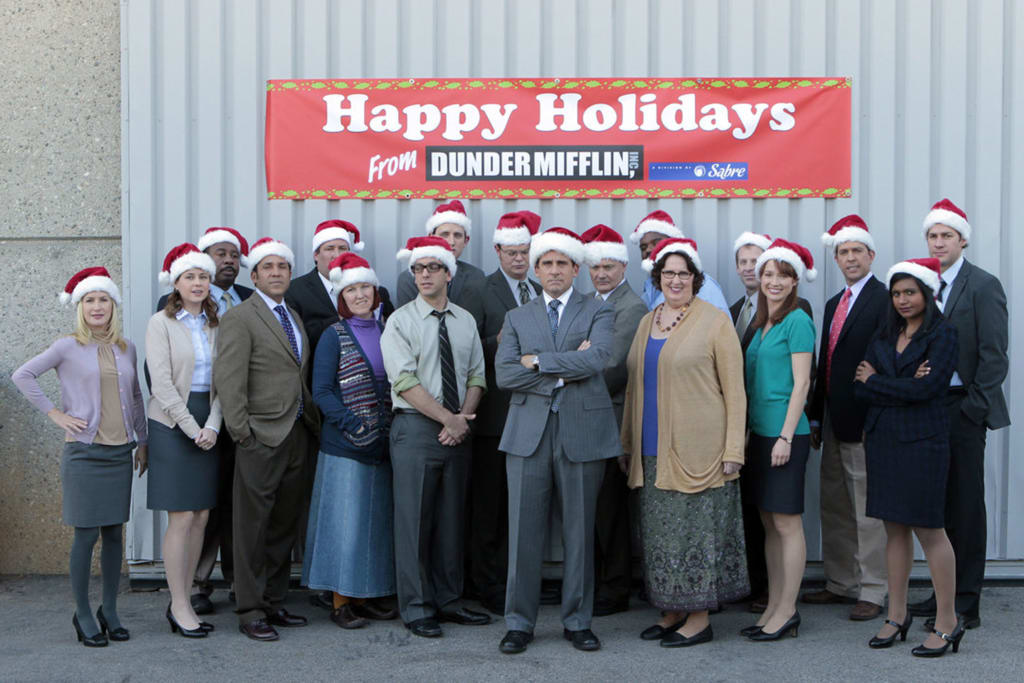

**Introduction**

---



The Office is an American mockumentary sitcom television series that represents the everyday work lives of office employees in the Scranton, Pennsylvania, branch of the fictional Dunder Mifflin Paper Company. 

It aired on NBC from March 24, 2005, to May 16, 2013, spanning a total of nine seasons. Based on the 2001–2003 BBC series of the same name created by Ricky Gervais and Stephen Merchant, it was adapted for American television by Greg Daniels, a veteran writer for Saturday Night Live, King of the Hill, and The Simpsons.

**Dataset**

---

The dataset consists of 12 columns and 188 rows scrapped from IMDb. Following dataset: datasets/office_episodes.csv, which downloaded from [kaggle](https://www.kaggle.com/nehaprabhavalkar/the-office-dataset?select=the_office_series.csv)

This dataset contains information on a variety of characteristics of each episode. In detail, these are:

**datasets/office_episodes.csv**

*   **episode_number:** Canonical episode number.
*   **season:** Season in which the episode appeared.

*   **episode_title:** Title of the episode.

*   **description:** Description of the episode.

*  **ratings:** bold text Average IMDB rating.
*   **votes:** Number of votes.


*   **viewership_mil:** Number of US viewers in millions.


*   **duration:** Duration in number of minutes.

*   **release_date:** Airdate.
*   **guest_stars:** Guest stars in the episode (if any).

*   **director:** Director of the episode.

*   **writers:** Writers of the episode.
*   **has_guests:** True/False column for whether the episode contained guest stars.


*   **scaled_ratings:** The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).












**Importing libraries**

---



In [ ]:

# Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt


**Reading the csv file and explore the first rows of the data**

---



In [ ]:
office_df = pd.read_csv('datasets/office_series.csv')
office_df.head()


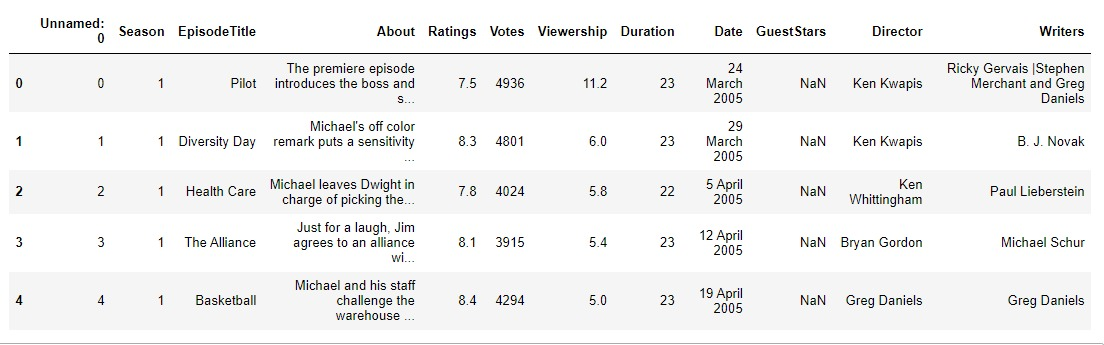

In [ ]:
office_df.info()

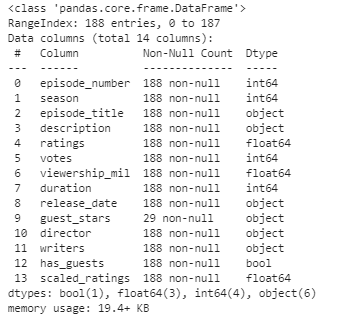

By using info() we have the summery of each column has been reading.

**Visualizing of data**

---


Visualize the Episode Number(along the x-axis) vs Viewers in Millions(along the y-axis) in a plot which can uncovering insights about our dataset as following:

In [ ]:
fig = plt.figure()
plt.scatter(x=office_df['episode_number'], y=office_df['viewership_mil'])
plt.show()

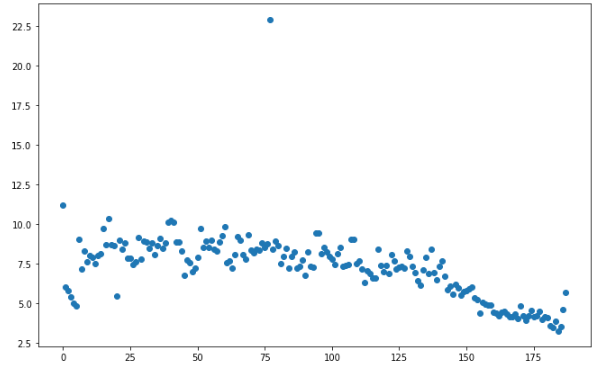

We can see over time increase of popularity during seasons and the later seasons do not have as much as popularity of the eariler seasons. And very large viewers of the episode between 75 and 100 along the x-axis.

**Plot customization**

---
Each individual point has a color associated with the rating was given. To run that we are going to use C argument to generate an array of color that we use to cutomize this plot. Then we going to add size according to size system so we do not only get a viewership but aslo know whether episodes had a guest star.
Adding title, x-axis label and y-axis label to illustrate to whoever see this plot what this plot is about.


In [ ]:
#color_scheme iterrows

cols = []
for rate in office_df.scaled_ratings:
    if rate < 0.25:
        cols.append('red')
    elif rate >= 0.25 and rate < 0.5:
        cols.append('orange')
    elif rate >= 0.5 and rate < 0.75:
        cols.append('lightgreen')
    elif rate >= 0.75:
        cols.append('darkgreen')
fig = plt.figure()

#sizes iterrows
sizes = []
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office")

# Create an x-axis label
plt.xlabel("Episode Number")

# Create a y-axis label
plt.ylabel("Viewership (Millions)")        
  
plt.scatter(x=office_df['episode_number'],
            y=office_df['viewership_mil'],
            c=cols,
            s=sizes
           )
plt.show()

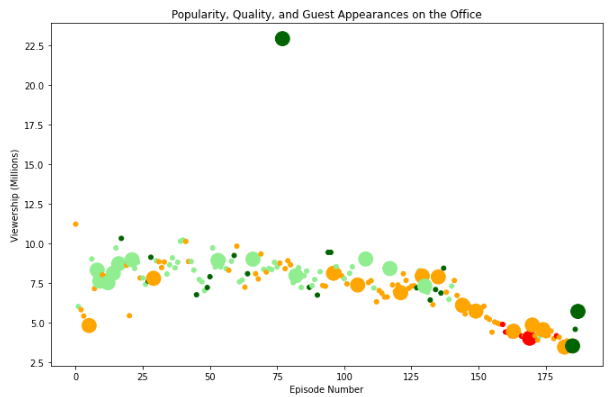

So we want to visualize realease date (on y-axis) instead of episode number. In order to illustreate the change of episodes viewers numbers during release dates we need to use parse_dates argument to tell pandas to treat release date as date as following:

In [ ]:
# Read in the csv as a DataFrame
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date'])
# Show the plot
plt.scatter(x=office_df['release_date'],
            y=office_df['viewership_mil'],
            c=cols,
            s=sizes
           )
plt.show()


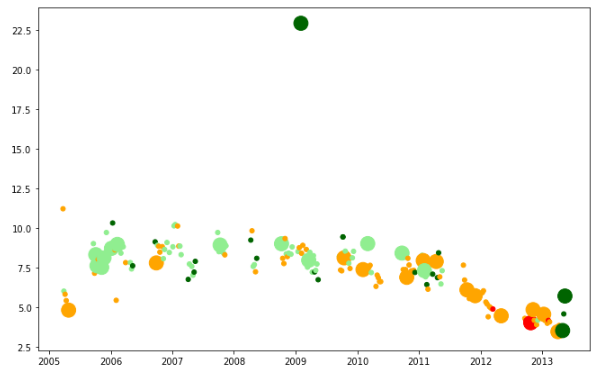

**Guest Appearances on the Office**

---

We plot the scatter plot by checking two different marker based on the availability of guest stars.

In [ ]:
# For ease of plotting, add our lists as columns to the DataFrame
office_df['colors'] = cols 
office_df['sizes'] = sizes

# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

# Create a normal scatter plot for non guest episodes
plt.scatter(x=non_guest_df['episode_number'],
            y=non_guest_df['viewership_mil'],
            c=non_guest_df['colors'],
            s=non_guest_df['sizes']
           )

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df['episode_number'],
            y=guest_df['viewership_mil'],
            c=guest_df['colors'],
            s=guest_df['sizes'],
            marker='*'
           )
plt.show()

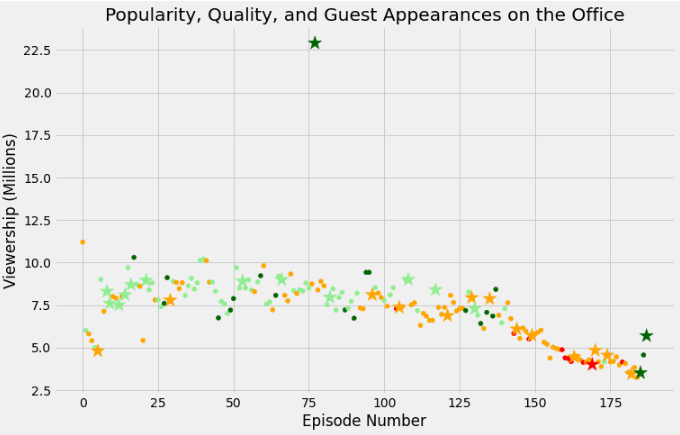

We used marker " * " to be easy to notice the difference between episodes with guests stars and without guests stars. We notice the star of episode 77 of the office with high viewership (more than 22.5 million) the resone behind this is that episode aired after the super bowl game.

**Most popular guest star**

---



In [ ]:
# Get the most popular guest star
print(office_df[office_df['viewership_mil'] > 20]['guest_stars']) 

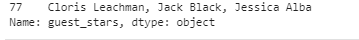

Finally, we have figured out the top guest stars from the most viewed episode of the office. They are Cloris Leachman, Jack Black and Jessica Alba.



**Reference:** 

---


The dataset from [kaggle](https://www.kaggle.com/nehaprabhavalkar/the-office-dataset)

The original project from [Data insight](https://projects.datacamp.com/projects/1170)


Regards, 

Eslam Elkot